## Applied - Question 10

The question involve Carseats dataset - A simulated data set containing sales of child car seats at 400 different stores.
 1. Sales: thousands
 2. CompPrice: Price charged by competitor at each location
 3. Income: Community income level (in thousands of dollars)
 4. Advertising: Local advertising budget for company at each location (in thousands of dollars)
 5. Population: Population size in region (in thousands)
 6. Price: Price company charges for car seats at each site
 7. ShelveLoc: A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 8. Age: Average age of the local population
 9. Education: Education level at each location
 10. Urban: A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 11. US: A factor with levels No and Yes to indicate whether the store is in the US or not

### Import block

In [9]:
import pandas as pd
import os
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

import statsmodels.stats.api as sms

%matplotlib inline
plt.style.use('seaborn-white')

(a) Import dataset and fit sales vs price, urban and us

In [12]:
data_path = 'D:\\PycharmProjects\\ISLR\\data\\'
carseats = pd.read_csv(f'{data_path}Carseats.csv', usecols=list(range(1,12)))
for i in ['Urban', 'US']:
    carseats[i] = carseats[i].astype('category').cat.codes
carseats['ShelveLoc'] = carseats['ShelveLoc'].astype('category')
carseats.info()
carseats.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null category
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null int8
US             400 non-null int8
dtypes: category(1), float64(1), int64(7), int8(2)
memory usage: 26.4 KB


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0


In [13]:
form = 'Sales ~ Price + Urban + US'
model = smf.ols(form, data=carseats)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 16 Oct 2019   Prob (F-statistic):           2.39e-23
Time:                        07:54:45   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
US             1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(b)
From the summary of the regression, only Price and US has a relationship with Sales based on p-values.  
Interpretation:
  1. For each dollar increase in price, Sales decrease by 54.5 units on average.
  2. If the store is in the US, Sales is higher than non US store by 1200.6 units on average.

(c) Sales = 13.0435 + -0.0545 Price + -0.0219 (Urban|Urban=1) + 1.2006 (US|US=1)  

(d) As stated above, we can reject the null hypothesis that Bi=0 for Price and US. There are 3 factors
to consider: F statistice > 1, F-statistic p-values ~ 0, p-value of each predictor is near 0

(e) Fit a smaller model using only Price and US

In [14]:
form = 'Sales ~ Price + US'
model = smf.ols(form, data=carseats)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 16 Oct 2019   Prob (F-statistic):           2.66e-24
Time:                        08:06:14   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US             1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(f) While our predictors are statistically significant, both model fit the data poorly with 
adjusted R-squared and RSE in the low 20s. IE, the model only explained 20% of the variance in Sales.

In [15]:
rss = np.sum(model_fit.resid**2)
rse = np.sqrt(rss/len(carseats))
print(f'RSE = {str(rse)}')

RSE = 2.460119134208168


Again, we visit 2 graphs to spot outlier and leverage.

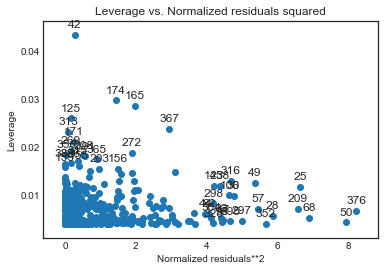

In [19]:
# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# leverage
from statsmodels.graphics.api import plot_leverage_resid2
fig = plot_leverage_resid2(model_fit)

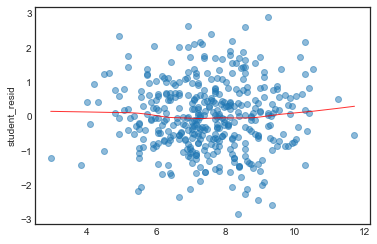

In [20]:
# outliers
student_resid = model_fit.outlier_test()['student_resid']
plt.scatter(model_fitted_y, student_resid, alpha=0.5)
sns.regplot(model_fitted_y, student_resid, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

While there are some high leverage points which raises concern, non appear to be outliers.
